# Crash Fever Button Detector
This code should find speciffic buttons on speciffic pages. 

The meaning of this is to build an AI that will follow this flow: Click on auto button when the game starts, then after the match is finished click on Ok button, then Continue then Retry to start all over again.


# Install requirements

In [92]:
!pip install opencv-python

# Imports

In [93]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

# Source images

In [94]:
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  return cv2.imdecode(image, cv2.IMREAD_COLOR)

# Click images
retry_btn = url_to_image("https://i.imgur.com/eyDmGrJ.png")
auto_btn = url_to_image("https://i.imgur.com/qwocZPf.png")
ok_btn = url_to_image("https://i.imgur.com/mRoic3z.png")
continue_btn = url_to_image("https://i.imgur.com/UQA6gLO.png")

# Images to Match
game_match = url_to_image("https://i.imgur.com/YjIJgXK.png")
game_end_1 = url_to_image("https://i.imgur.com/5TUE53s.png")
game_end_2 = url_to_image("https://i.imgur.com/Wd5Yyil.png")
game_end_3 = url_to_image("https://i.imgur.com/14PvaPe.png")

# Images to match false
game_match_auto = url_to_image("https://i.imgur.com/bszWSKH.png")


# Constants

In [95]:
# Threshold

auto_threshold = .90
retry_threshold = .90
ok_threshold = .95
continue_threshold = .90

# Drawing
box_color = (0, 255, 0)
box_border_width = 2

# Match Auto Button



## Match Game auto off
Should find the auto button on screen when the button is disabled.

In [96]:
match_auto_btn = cv2.matchTemplate(game_match, auto_btn, cv2.TM_CCOEFF_NORMED)

auto_btn_yloc, auto_btn_xloc = np.where(match_auto_btn >= auto_threshold)
print("Number of matches equal or above the threshold: %d" % len(auto_btn_xloc))

Number of matches equal or above the threshold: 1


### Drawing on image

In [97]:
auto_btn_w = auto_btn.shape[1]
auto_btn_h = auto_btn.shape[0]

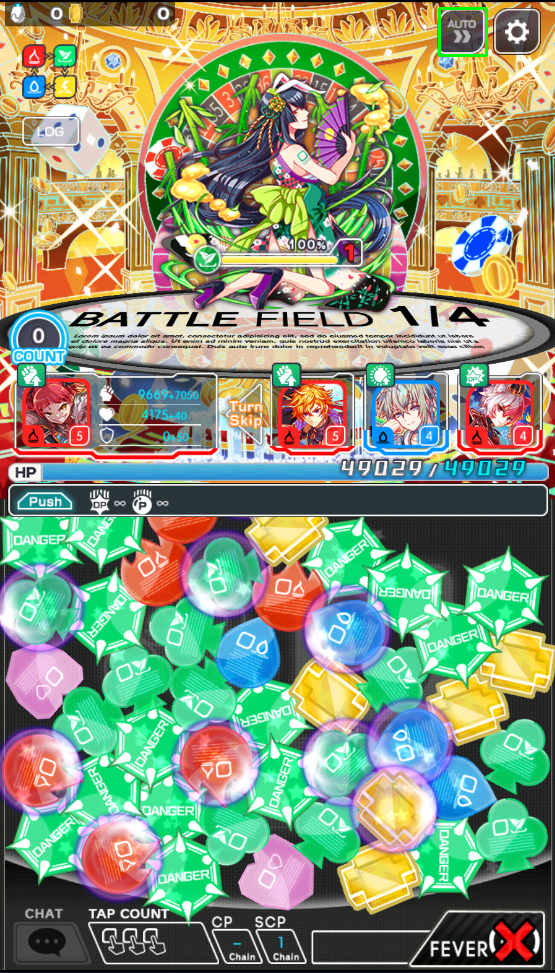

In [98]:
if len(auto_btn_xloc) > 0:
  cv2.rectangle(game_match, (auto_btn_xloc[0], auto_btn_yloc[0]), (auto_btn_xloc[0] + auto_btn_w, auto_btn_yloc[0] + auto_btn_h), box_color, box_border_width)
cv2_imshow(game_match)

## Match Game auto on

When the auto button is enabled the algorithm should't drawn the burron since the value is lower than the auto button threshold.

In [99]:
match_auto_btn = cv2.matchTemplate(game_match_auto, auto_btn, cv2.TM_CCOEFF_NORMED)

auto_btn_yloc, auto_btn_xloc = np.where(match_auto_btn >= auto_threshold)
print("Number of matches equal or above the threshold: %d" % len(auto_btn_xloc))

Number of matches equal or above the threshold: 0


### Drawing on image



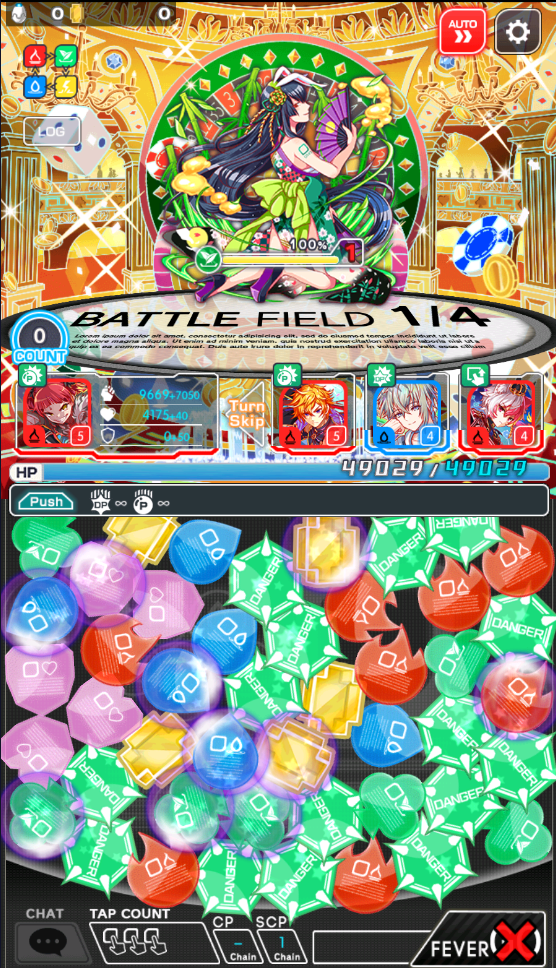

In [100]:
if len(auto_btn_xloc) > 0:
  cv2.rectangle(game_match_auto, (auto_btn_xloc[0], auto_btn_yloc[0]), (auto_btn_xloc[0] + auto_btn_w, auto_btn_yloc[0] + auto_btn_h), box_color, box_border_width)
cv2_imshow(game_match_auto)

# Match Ok Button
Should find the Ok button on screen.

In [101]:
match_ok_btn = cv2.matchTemplate(game_end_1, ok_btn, cv2.TM_CCOEFF_NORMED)

ok_btn_yloc, ok_btn_xloc = np.where(match_ok_btn >= ok_threshold)
print("Number of matches equal or above the threshold: %d" % len(ok_btn_xloc))

Number of matches equal or above the threshold: 1


### Drawing on image

In [102]:
ok_btn_w = ok_btn.shape[1]
ok_btn_h = ok_btn.shape[0]

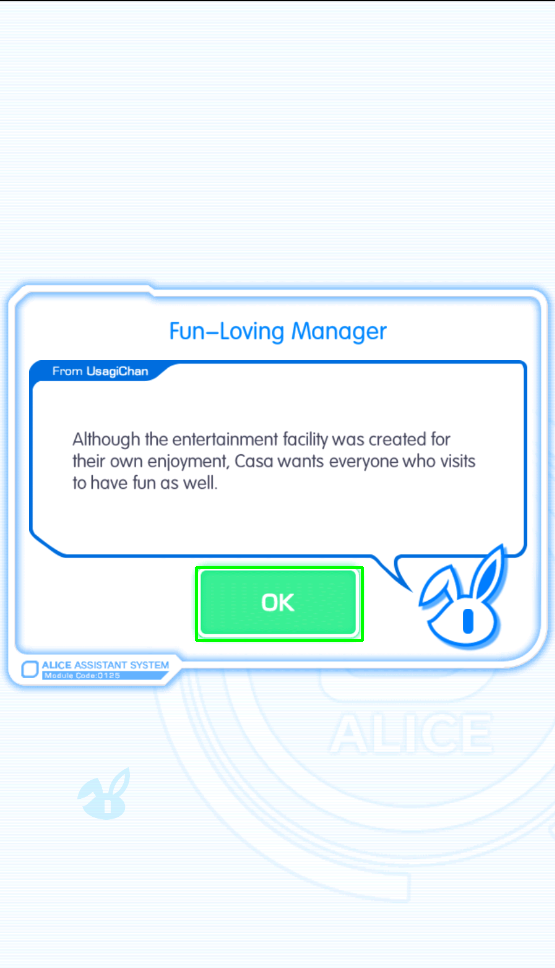

In [103]:
if len(ok_btn_xloc) > 0:
  cv2.rectangle(game_end_1, (ok_btn_xloc[0], ok_btn_yloc[0]), (ok_btn_xloc[0] + ok_btn_w, ok_btn_yloc[0] + ok_btn_h), box_color, box_border_width)
cv2_imshow(game_end_1)

# Match Continue Button
Should find the Continue button on screen.

In [104]:
match_continue_btn = cv2.matchTemplate(game_end_2, continue_btn, cv2.TM_CCOEFF_NORMED)

continue_btn_yloc, continue_btn_xloc = np.where(match_continue_btn >= continue_threshold)
print("Number of matches equal or above the threshold: %d" % len(continue_btn_xloc))

Number of matches equal or above the threshold: 1


### Drawing on image

In [105]:
continue_btn_w = continue_btn.shape[1]
continue_btn_h = continue_btn.shape[0]

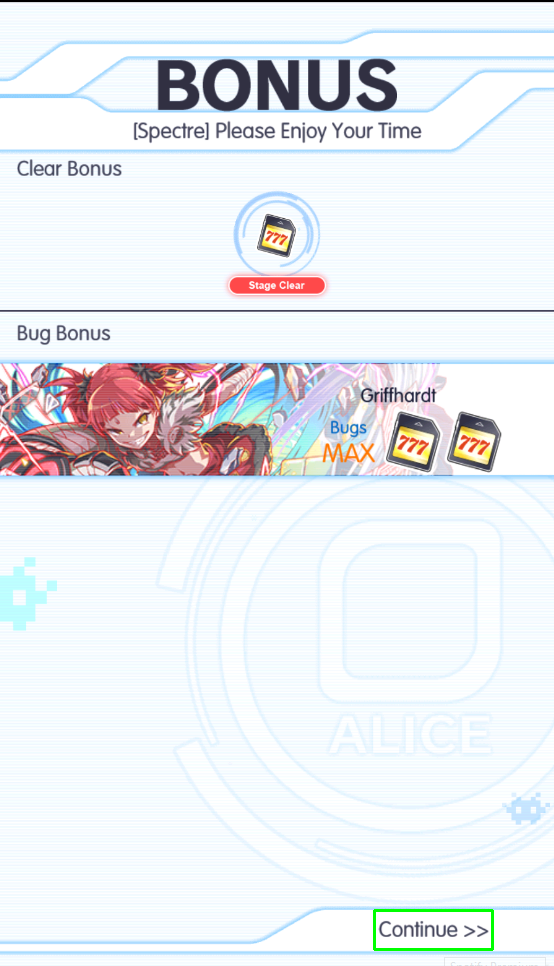

In [106]:
if len(continue_btn_xloc) > 0:
  cv2.rectangle(game_end_2, (continue_btn_xloc[0], continue_btn_yloc[0]), (continue_btn_xloc[0] + continue_btn_w, continue_btn_yloc[0] + continue_btn_h), box_color, box_border_width)
cv2_imshow(game_end_2)

# Match Retry Button
Should find the Retry button on screen.

In [107]:
match_retry_btn = cv2.matchTemplate(game_end_3, retry_btn, cv2.TM_CCOEFF_NORMED)

retry_btn_yloc, retry_btn_xloc = np.where(match_retry_btn >= retry_threshold)
print("Number of matches equal or above the threshold: %d" % len(retry_btn_xloc))

Number of matches equal or above the threshold: 1


## Drawing image

In [108]:
retry_btn_w = retry_btn.shape[1]
retry_btn_h = retry_btn.shape[0]

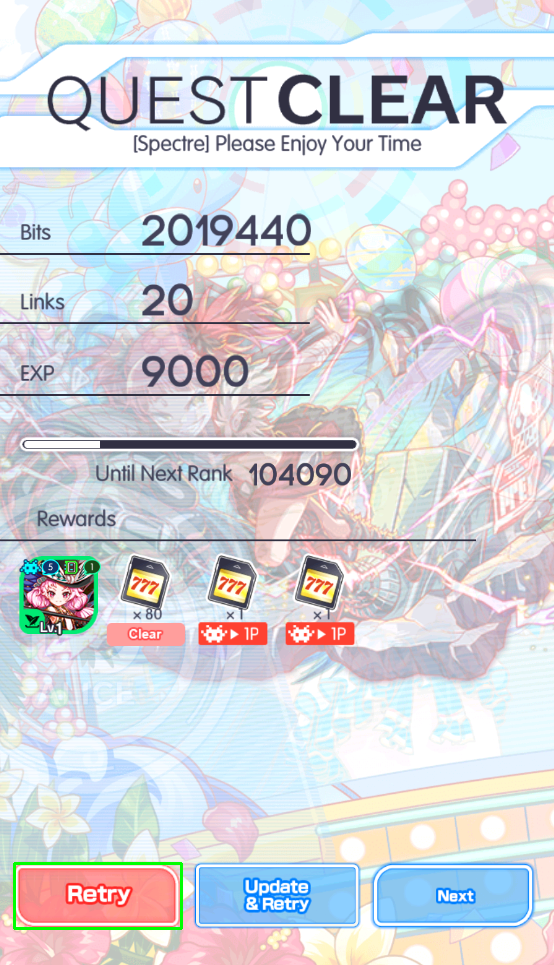

In [109]:
if len(retry_btn_yloc) > 0:
  cv2.rectangle(game_end_3, (retry_btn_xloc[0], retry_btn_yloc[0]), (retry_btn_xloc[0] + retry_btn_w, retry_btn_yloc[0] + retry_btn_h), box_color, box_border_width)
cv2_imshow(game_end_3)